<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

<h2 style="text-align: left; background-color:#b20710; font-family: Arial Black; color: #f5f5f1; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 100px 100px;">INTRODUCTION</h2>

This notebook uses the Netflix Movies and TV Shows dataset to discover some insights about this streaming service through data manipulation and visualization practices.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

<h2 style="text-align: left; background-color:#b20710; font-family: Arial Black; color: #f5f5f1; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 100px 100px;">DATA PREPARATION</h2>

## A glimpse at the dataframe

In [2]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data preprocessing
After taking a look at the dataset, I noticed that there are missing values in columns including <code>director</code>, <code>cast</code>, and <code>country</code>. I've got a hunch the same might happen in other columns as well, so <code>.info()</code> and <code>.isna()</code> will be used to inspect this.

In [3]:
df.info()

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Data cleaning

Turns out there are quite a few missing values in <code>director</code>, <code>cast</code>, and <code>country</code>, while only some are missed in <code>date_added</code>, <code>rating</code>, and <code>duration</code>.

Therefore, the string "None" will be replacing NaNs in <code>cast</code>, and <code>country</code>.  For <code>country</code>, I'll replace missing values with one that appears to be the most dominant Netflix market (United States). The other NaNs will be dropped for more convenient analysis process.

In [4]:
# Replace NaNs
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['director'].replace(np.nan, 'None', inplace=True)
df['cast'].replace(np.nan, 'None', inplace=True)

# Drop NaNs
df.dropna(inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

In [5]:
df.info()

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Split countries and retrieve only one
Some movies and TV shows may be available on Netflix of more than one country, but within this notebook's scope, let's only take the first country listed in the <code>country</code> column to be the main region.

In [6]:
# Add a new column with only the first country retrieved
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])

## Convert datetime data
<code>date_added</code> will be converted from long format to short format. Two new columns <code>month_added</code> and <code>year_added</code> will be created as well.

In [7]:
# Convert date
df['date_added'] = pd.to_datetime(df['date_added'])

# Add month_added and year_added columns
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year.astype(int)

# Create ordered levels for months
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['month_added'] = pd.Categorical(df['month_added'], categories=month_order, ordered=True)

## From rating to age groups
The current movies and TV shows ratings will be categorized into four main age groups: Adults, Teens, Older Kids, and Kids

In [8]:
# Add rating_age column
age_group = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['rating_age'] = df['rating'].replace(age_group)

In [9]:
# The final DataFrame
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,first_country,month_added,year_added,rating_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,September,2021,Teens
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,September,2021,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,United States,September,2021,Adults
3,s4,TV Show,Jailbirds New Orleans,None,None,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",United States,September,2021,Adults
4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,September,2021,Adults


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

<h2 style="text-align: left; background-color:#b20710; font-family: Arial Black; color: #f5f5f1; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 100px 100px;">ANALYSIS & VISUALIZATION</h2>

In this part of the notebook, we'll begin uncovering some insights based on task ideas susggested by the dataset owner:
- What content is available in different countries
- Does Netflix has more focus on TV Shows than movies in recent years?

We'll start with the first question. Since the data is quite large, we'll mostly focus on the top 10 countries with most contents available on Netflix.

In [10]:
# Total number of contents in each country
content_counts = df.groupby('first_country')[['title']].count()
content_counts.sort_values(by='title', ascending=False, inplace=True)

# Top 10 countries with most contents
content_counts_10 = content_counts.head(10)

display(content_counts_10)

,title
first_country,
United States,4031
India,1008
United Kingdom,627
Canada,271
Japan,257
France,212
South Korea,211
Spain,181
Mexico,134


Text(0.5, 0, '')

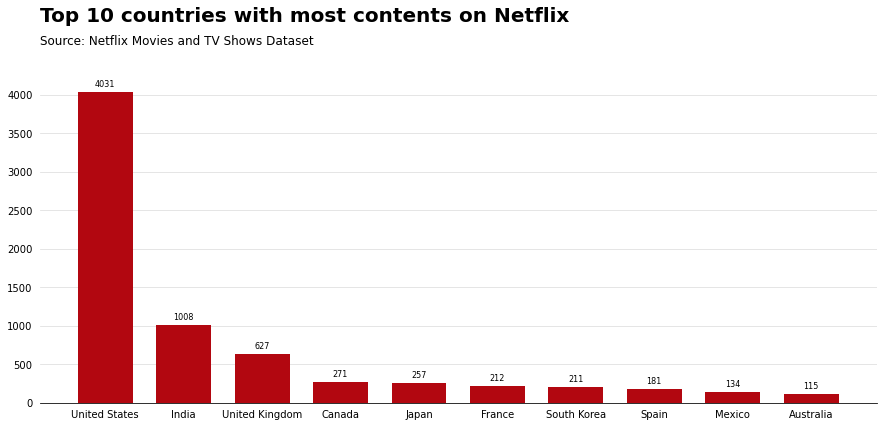

In [11]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.bar(content_counts_10.index, content_counts_10.title, width=0.7, color='#b20710')

for p in ax.patches:
    ax.annotate(text=p.get_height(),
                xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 8), textcoords='offset points',
                ha='center', va='center', size=8)

# Ticks
ax.tick_params(axis='both', which='major', bottom=False, left=False, labelsize=10)

# Grid
ax.grid(axis='y', linestyle='-', alpha=0.4) 
ax.set_axisbelow(True)

# Frame border
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)

# Legend
plt.legend().remove()

# Title, subtitle, and axis title
ax.set_title('Top 10 countries with most contents on Netflix', loc='left', y=1.15, size=20, fontweight='bold', fontfamily='san serif')
ax.text(0, 1.1, 'Source: Netflix Movies and TV Shows Dataset',  transform=ax.transAxes, ha='left', size=12, fontfamily='san serif')
ax.set_xlabel(None)

**Comment:** As expected, the region where Netflix's headquarter is placed, i.e., the United States has the largest movies and TV shows resources, whereas India and the United Kingdom come in second and third place, respectively.

In [12]:
# Create a list of top 10 countries
top10 = list(content_counts_10.index)

print(top10)

['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']


## What content is available in different countries?
We'll see the percentages of movies and TV shows available in each of the top 10 countries.

In [13]:
# Number of contents by type for the top 10 countries
country_type = df.groupby('first_country')['type'].value_counts().unstack()
country_type_10 = country_type.loc[top10]

# Transpose
display(country_type_10.T)

# Add a sum column
country_type_10['sum'] = country_type_10.sum(axis=1)

display(country_type_10)

first_country,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Australia
type,,,,,,,,,,
Movie,2800.0,927.0,382.0,187.0,85.0,148.0,47.0,129.0,86.0,61.0
TV Show,1231.0,81.0,245.0,84.0,172.0,64.0,164.0,52.0,48.0,54.0


type,Movie,TV Show,sum
first_country,,,
United States,2800.0,1231.0,4031.0
India,927.0,81.0,1008.0
United Kingdom,382.0,245.0,627.0
Canada,187.0,84.0,271.0
Japan,85.0,172.0,257.0
France,148.0,64.0,212.0
South Korea,47.0,164.0,211.0
Spain,129.0,52.0,181.0
Mexico,86.0,48.0,134.0


In [14]:
# Calculate the percentage for each type (matrix division)
country_type_10_per = (country_type_10.T / country_type_10['sum']).T

# Sort values
country_type_10_per_sort = country_type_10_per[['Movie','TV Show']].sort_values(by='Movie')

display(country_type_10_per_sort)

type,Movie,TV Show
first_country,,
South Korea,0.222749,0.777251
Japan,0.330739,0.669261
Australia,0.530435,0.469565
United Kingdom,0.609250,0.390750
Mexico,0.641791,0.358209
Canada,0.690037,0.309963
United States,0.694617,0.305383
France,0.698113,0.301887
Spain,0.712707,0.287293


Text(0.805, 0.9, 'TV Show')

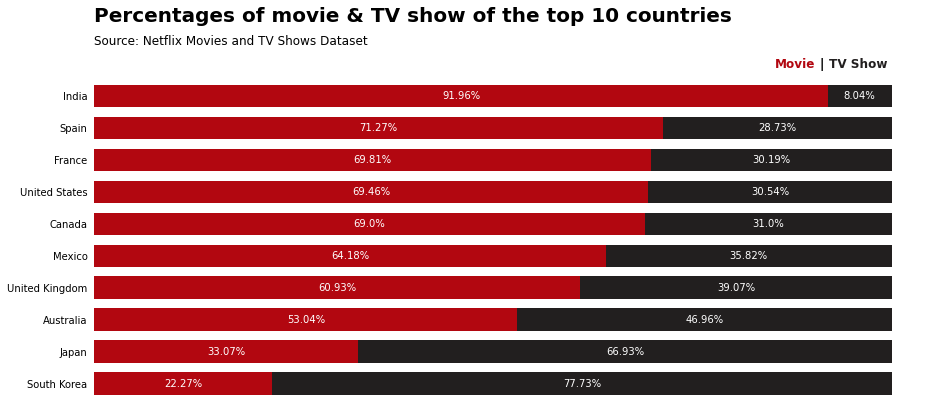

In [15]:
# Plot
fig = plt.figure(figsize=(15, 6))
ax = country_type_10_per_sort['Movie'].plot(kind='barh', width=0.7, color='#b20710')
ax = country_type_10_per_sort['TV Show'].plot(kind='barh', width=0.7, color='#221f1f', left=country_type_10_per_sort['Movie'])

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(text=str(np.round(width*100, 2)) + '%', 
                xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', color='white')

# Ticks and ticks label
ax.tick_params(axis='both', which='major', bottom=False, left=False, labelsize=10)
ax.set_xticklabels([])

# Frame border
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)

# Title and axis title
ax.set_title('Percentages of movie & TV show of the top 10 countries', loc='left', y=1.15, size=20, fontweight='bold', fontfamily='san serif')
ax.text(0, 1.1, 'Source: Netflix Movies and TV Shows Dataset',  transform=ax.transAxes, ha='left', size=12, fontfamily='san serif')
ax.set_ylabel(None)

# Annotation
fig.text(0.755,0.9,'Movie', fontweight='bold', fontsize=12, color='#b20710')
fig.text(0.796,0.9,'|', fontweight='bold', fontsize=12, color='black')
fig.text(0.805,0.9,'TV Show', fontweight='bold', fontsize=12, color='#221f1f')

**Comment:** We can see that the Indian market is significantly dominated by movies with nearly 92% of the contents falling into this category. On the other hand, the opposite is applied for South Korea with only 22.27% of the contents being movies. This actually surprises me as I've expected Netflix Korea to have an evenly distribued proportion of contents due to the popularity of both K-dramas and their TV shows!

## Does Netflix has more focus on TV Shows than movies in recent years?
Let's see how many movies and TV shows have been added onto Netflix in recent years.

In [16]:
# Titles categorized by type and year added (for DataFrame viewing only)
conent_year_df = df.groupby(['type', 'year_added'])[['title']].count()

display(conent_year_df)

title
type    year_added       
Movie   2008            1
        2009            2
        2010            1
        2011           13
        2012            3
        2013            6
        2014           19
        2015           56
        2016          251
        2017          836
        2018         1237
        2019         1424
        2020         1284
        2021          993
TV Show 2008            1
        2013            5
        2014            5
        2015           26
        2016          175
        2017          349
        2018          411
        2019          592
        2020          595
        2021          505

Text(0.85, 0.9, 'TV Show')

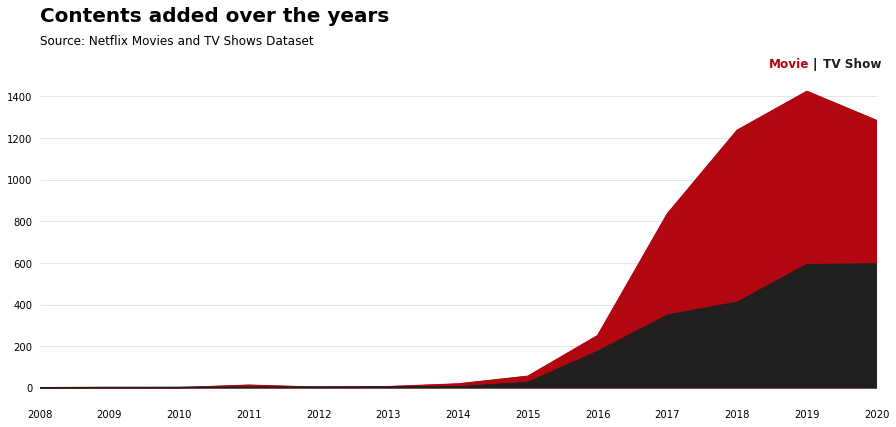

In [17]:
# Series (ex: Movie)
#conent_year_series = df[df['type']=='Movie']['year_added'].value_counts().sort_index()
#display(conent_year_series)
#display(conent_year_series.index)

# Plot
palette = ['#b20710', '#221f1f']

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

for i, type in enumerate(['Movie','TV Show']):
    content_year = df[df['type']==type]['year_added'].value_counts().sort_index()
    ax.plot(content_year.index, content_year, color=palette[i], label=type)
    ax.fill_between(x=content_year.index, y1=0, y2=content_year, color=palette[i])

# Axis
ax.set_xlim(2008,2020)
    
# Ticks and ticks label
ax.tick_params(axis='both', which='major', bottom=False, left=False, labelsize=10)
plt.xticks(np.arange(2008, 2021, 1))

# Grid
ax.grid(axis='y', linestyle='-', alpha=0.4) 
ax.set_axisbelow(True)

# Frame border
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)
    
# Title and axis title
ax.set_title('Contents added over the years', loc='left', y=1.15, size=20, fontweight='bold', fontfamily='san serif')
ax.text(0, 1.1, 'Source: Netflix Movies and TV Shows Dataset',  transform=ax.transAxes, ha='left', size=12, fontfamily='san serif')

# Annotation
fig.text(0.8,0.9,'Movie', fontweight='bold', fontsize=12, color='#b20710')
fig.text(0.841,0.9,'|', fontweight='bold', fontsize=12, color='black')
fig.text(0.85,0.9,'TV Show', fontweight='bold', fontsize=12, color='#221f1f')

**Comment**: The number of new movies added has increased drastically from over 200 titles to more than 1,400 during 2016 to before 2019. After that, there was a considerable drop in it which was probably due to the impacts of COVID-19 causing delays in the production of new movies, especially Netflix originals series.

As for TV shows, there was a steep rise in the number of new contents added from 2015 to 2017 before it reached a peak in 2019. In constrast with movies, newly added TV shows content only decreased moderately during 2019.

## How about the contents added by month?
I'm also interested in the overall contents added monthly to see when Netflix tend to update new movies and TV shows.

In [18]:
# Number of titles categorized by month
content_month_df = df.groupby('month_added')[['title']].count()

display(content_month_df)

,title
month_added,
January,737
February,562
March,741
April,763
May,632
June,728
July,827
August,754
September,769


Text(0.5, 0, '')

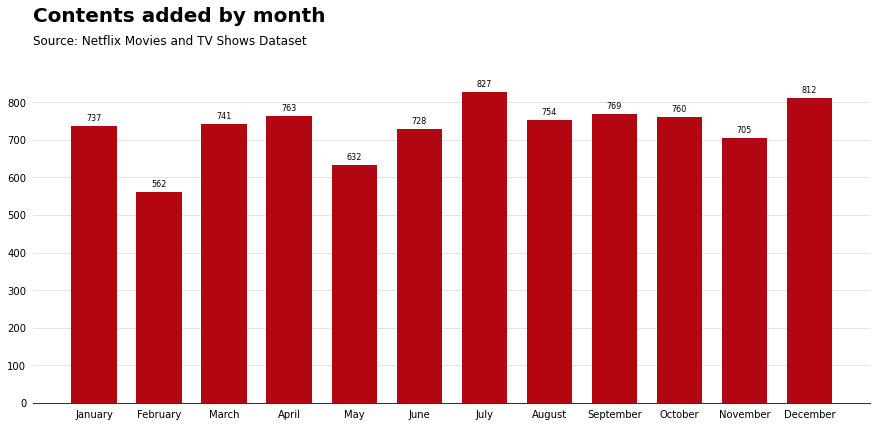

In [19]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.bar(content_month_df.index, content_month_df.title, width=0.7, color='#b20710')

for p in ax.patches:
    ax.annotate(text=p.get_height(),
                xy=(p.get_x() + p.get_width() / 2, p.get_height()),
                xytext=(0, 8), textcoords='offset points',
                ha='center', va='center', size=8)

# Ticks and ticks label
ax.tick_params(axis='both', which='major', bottom=False, left=False, labelsize=10)

# Grid
ax.grid(axis='y', linestyle='-', alpha=0.4) 
ax.set_axisbelow(True)

# Frame border
for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)

# Legend
plt.legend().remove()

# Title and axis title
ax.set_title('Contents added by month', loc='left', y=1.15, size=20, fontweight='bold', fontfamily='sans serif')
ax.text(0, 1.1, 'Source: Netflix Movies and TV Shows Dataset',  transform=ax.transAxes, ha='left', size=12, fontfamily='san serif')
ax.set_xlabel(None)

**Comment:** Many movie and TV show contents were added in July and December. Netflix must have been aware that users tend to have more free time to enjoy streaming during these periods :)

## Which demographics are considered as main audience?
To answer this, we'll try digging into how the ratings are distrbiuted.

In [20]:
# Number of ratings for each type of contents
type_rating = df.groupby('type')['rating'].value_counts().fillna(0)

# Subsets
type_rating_mov = type_rating.loc['Movie']
type_rating_tv = type_rating.loc['TV Show']

Text(0.85, 0.9, 'TV Show')

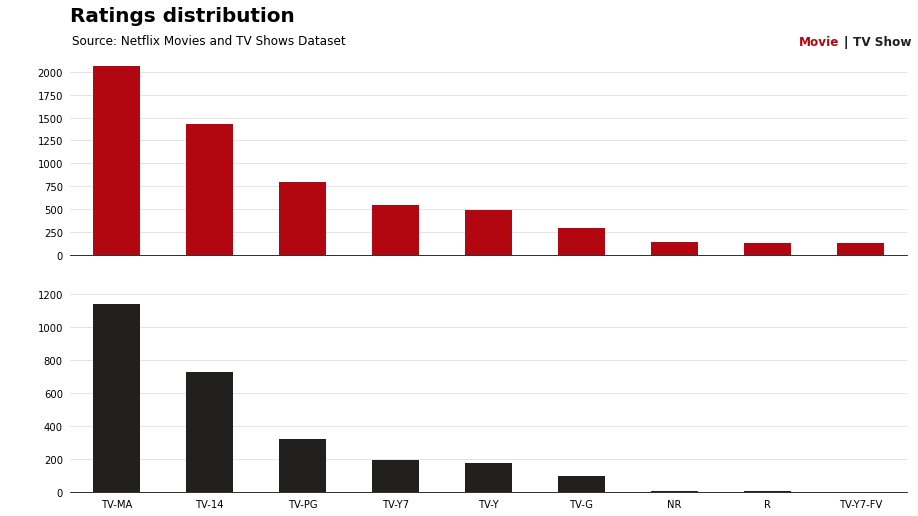

In [21]:
# Plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15, 8))

type_rating_mov.plot(ax=ax1, kind='bar', color='#b20710')
type_rating_tv.plot(ax=ax2, kind='bar', color='#221f1f')

# Ticks and ticks label
ax1.tick_params(axis='both', which='major', bottom=False, left=False, labelsize=10)
ax2.tick_params(axis='both', which='major', bottom=False, left=False, labelsize=10)
plt.xticks(rotation=0)

# Grid
ax1.grid(axis='y', linestyle='-', alpha=0.4) 
ax1.set_axisbelow(True)
ax2.grid(axis='y', linestyle='-', alpha=0.4) 
ax2.set_axisbelow(True)

# Frame border
for s in ['top', 'right', 'left']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

# Legend
plt.legend().remove()

# Title and axis title
ax1.set_title('Ratings distribution', loc='left', y=1.15, size=20, fontweight='bold', fontfamily='sans serif')
ax1.text(-0.075, 1.28, 'Source: Netflix Movies and TV Shows Dataset',  transform=ax.transAxes, ha='left', size=12, fontfamily='san serif')
ax2.set_xlabel(None)

# Annotation
fig.text(0.8,0.9,'Movie', fontweight='bold', fontsize=12, color='#b20710')
fig.text(0.841,0.9,'|', fontweight='bold', fontsize=12, color='black')
fig.text(0.85,0.9,'TV Show', fontweight='bold', fontsize=12, color='#221f1f')

**Comment:** The majority of contents seems to aim at adult and teen viewers.

## How about within the top 10 countries?

In [22]:
# Number of contents categorized by rating age in each country
country_rating = df[df['first_country'].isin(top10)].groupby('first_country')['rating_age'].value_counts().unstack()

# Reorder column index for better visualization
cols_order = ['Adults', 'Teens', 'Older Kids', 'Kids']
country_rating = country_rating.reindex(columns=cols_order)

display(country_rating)

rating_age,Adults,Teens,Older Kids,Kids
first_country,,,,
Australia,53,18,27,17
Canada,129,45,58,39
France,132,40,22,18
India,266,568,160,14
Japan,91,97,66,3
Mexico,103,16,13,2
South Korea,93,84,25,9
Spain,148,19,8,6
United Kingdom,328,137,111,51


Text(114.0, 0.5, '')

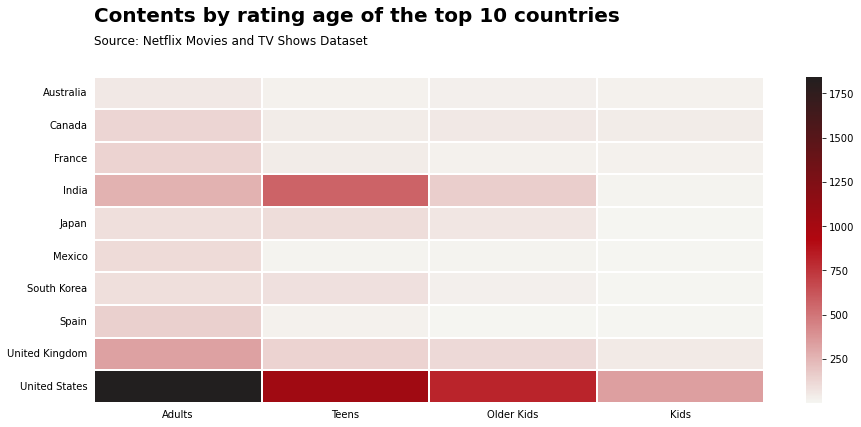

In [23]:
# Plot
import matplotlib.colors
palette = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#f5f5f1', '#b20710','#221f1f'])

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.heatmap(country_rating, cmap=palette, linewidth=1.5)

# Ticks and ticks label
ax.tick_params(axis='both', which='major', bottom=False, left=False, labelsize=10)

# Title and axis title
ax.set_title('Contents by rating age of the top 10 countries', loc='left', y=1.15, size=20, fontweight='bold', fontfamily='sans serif')
ax.text(0, 1.1, 'Source: Netflix Movies and TV Shows Dataset',  transform=ax.transAxes, ha='left', size=12, fontfamily='san serif')
ax.set_xlabel(None)
ax.set_ylabel(None)

**Comment:** Among the top 3 countries, the United States and the United Kingdom seem to focus more on adult age group, while India mainly aims at teens, which is shown by the darkest-colored cells of these countries. However, Netflix US also provides many contents for teen group as well.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist"></div>

<h2 style="text-align: left; background-color:#b20710; font-family: Arial Black; color: #f5f5f1; padding: 13px; line-height:0.9;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 25px; border-radius: 100px 100px;">APPENDIX</h2>

Thank you for looking through my notebook! I'd also like to thank Mr. Josh's amazing [notebook](https://www.kaggle.com/code/joshuaswords/netflix-data-visualization) references allowing me to practice data visualization!

Some helpful links:
- https://www.kaggle.com/getting-started/302454 (<code>mode[0]</code> explanation)
- https://www.geeksforgeeks.org/enumerate-in-python/ (<code>enumerate</code> explanation)